In [4847]:
import numpy as np
import pandas as pd
import random 

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
    
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4848]:
import warnings
warnings.filterwarnings('ignore')

In [4849]:
matplotlib.rcParams.update({'font.size': 14})

In [4850]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
        
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
        
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    
    plt.show()

In [4851]:
#Описание датасета
# **Id** - идентификационный номер квартиры
#**DistrictId** - идентификационный номер района
# **Rooms** - количество комнат
#**Square** - площадь
#**LifeSquare** - жилая площадь
#**KitchenSquare** - площадь кухни
#**Floor** - этаж
# **HouseFloor** - количество этажей в доме
# **HouseYear** - год постройки дома
#**Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
#**Social_1, Social_2, Social_3** - социальные показатели местности
# **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
# **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
#**Price** - цена квартиры

In [4949]:
TRAIN_DATASET_PATH = '/Users/maria/Downloads/train.csv'
TEST_DATASET_PATH = '/Users/maria/Downloads/test.csv'
RESULT_DATASET_PATH = '/Users/maria/repos/result.csv'

In [4853]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [4854]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [4855]:
# Информация о количестве признаков объектов
train_df.shape[1]

20

In [4856]:
# Информация о сравниении количества признаков объектов в тренировочном и тестовом датафреймах
train_df.shape[1]-1 == test_df.shape[1]

True

In [4857]:
# Информация о количестве объектов и количестве признаков
train_df.shape

(10000, 20)

In [4858]:
test_df.shape

(5000, 19)

In [4859]:
# Информация о типах признаков в тренировочном датасете
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [4860]:
# Информация о типах признаков и о пропусках в данных в тренировочном датасете
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [4861]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [4862]:
# Приведение признаков "Id" и "DistrictId" к строковому типу
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
train_df['Square'] = train_df['Square'].astype(int)

In [4863]:
# Проверяем 
train_df.dtypes

Id                object
DistrictId        object
Rooms            float64
Square             int64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [4864]:
test_df['Id'] = test_df['Id'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)
test_df['Square'] = test_df['Square'].astype(int)

In [4865]:
test_df.dtypes

Id                object
DistrictId        object
Rooms            float64
Square             int64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

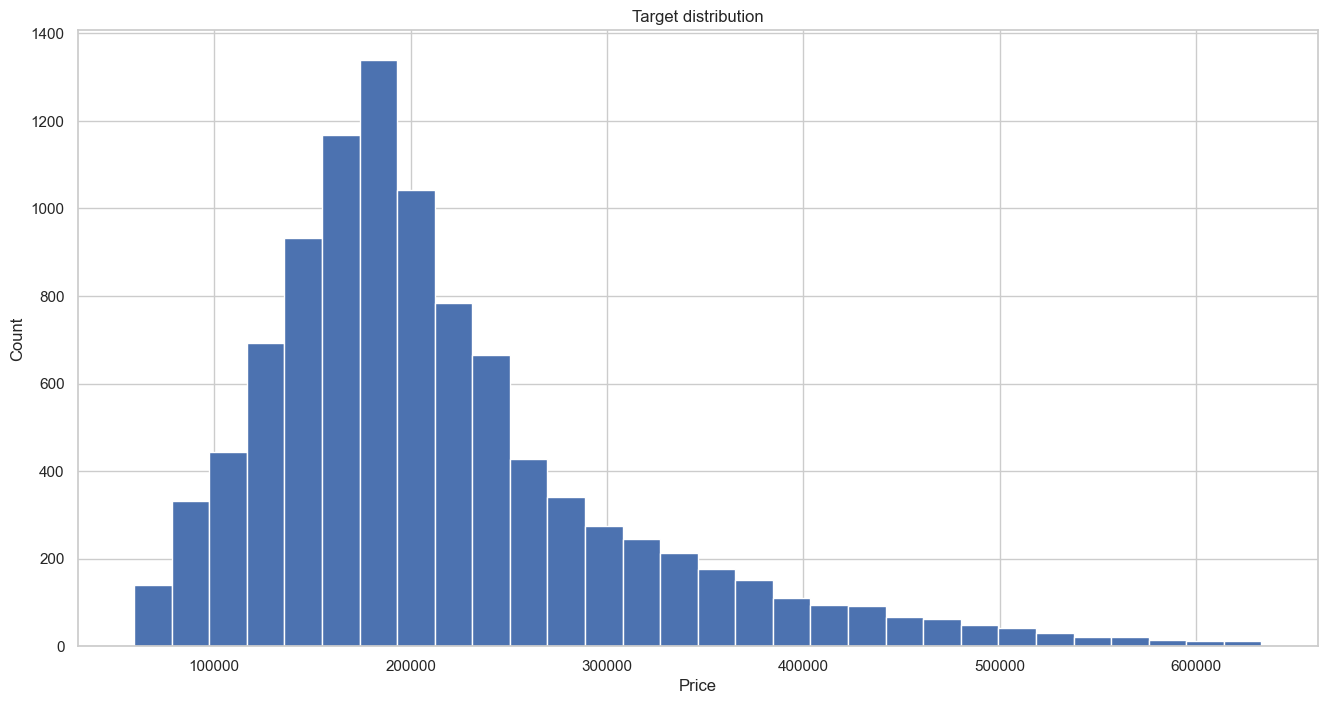

In [4866]:
# Анализ данных, выявление аномалий
plt.figure(figsize = (16, 8))
    
train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')
plt.show()

In [4867]:
# Анализ нецелевых признаков
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,55.816900,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.055567,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.000000,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.000000,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.000000,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.000000,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.000000,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [4868]:
test_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,1.910000,55.946600,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,0.838594,19.090444,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,0.000000,1.000000,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,41.000000,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,2.000000,52.000000,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,2.000000,66.000000,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,17.000000,223.000000,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [4869]:
# Анализ данных о количестве комнат с нулевым значением
train_df[train_df['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [4870]:
test_df[test_df['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,0.0,76,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


In [4871]:
test_df['KitchenSquare'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  22.,
        24.,  30.,  33.,  34.,  40.,  41.,  42.,  44.,  57.,  60.,  61.,
        62.,  65.,  97., 112., 620.])

In [4872]:
test_df['KitchenSquare'].quantile(.999)

61.001000000000204

In [4873]:
test_df = test_df[test_df['Square'].isnull() |
                    ((test_df['Square'] < test_df['Square'].quantile(.998)) &
                    (test_df['Square'] > test_df['Square'].quantile(.002)))]
    
test_df = test_df[test_df['LifeSquare'].isnull() |
                    ((test_df['LifeSquare'] < test_df['LifeSquare'].quantile(.999)) &
                    (test_df['LifeSquare'] > test_df['LifeSquare'].quantile(.025)))]
    
test_df = test_df[test_df['KitchenSquare'].isnull() |
                    (test_df['KitchenSquare'] < test_df['KitchenSquare'].quantile(.999))]
    
test_df.loc[test_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

original_columns = test_df.columns.values

In [4874]:
original_columns

array(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare',
       'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1',
       'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2'], dtype=object)

In [4875]:
# Выбираем категориальные признаки с типом "object" и выводим список колонок
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [4876]:
# Посмотрим количество районов
len(train_df['DistrictId'].value_counts())

205

In [4877]:
# Наиболее часто встречающие районы в 'DistrictId'
train_df['DistrictId'].value_counts().head()

27    851
1     652
23    565
6     511
9     294
Name: DistrictId, dtype: int64

In [4878]:
# Смотрим какие категории встречаются в 'Ecology_2'
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [4879]:
# Смотрим какие категории встречаются в 'Ecology_3'
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [4880]:
# Смотрим какие категории встречаются в категории инфраструктуры 'Shops_2'
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [4881]:
# Обработка выбросов
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [4882]:
test_df['Rooms'].value_counts()

2.0     1998
1.0     1715
3.0     1064
4.0       87
5.0        4
0.0        2
6.0        1
17.0       1
Name: Rooms, dtype: int64

In [4883]:
# Заменяем выбросы на среднее значение
train_df.loc[train_df['Rooms'].isin([0, 10, 19]), 'Rooms'] = train_df['Rooms'].median()
train_df['Rooms'].value_counts()

2.0    3891
1.0    3705
3.0    2235
4.0     150
5.0      18
6.0       1
Name: Rooms, dtype: int64

In [4884]:
test_df.loc[test_df['Rooms'].isin([0, 17]), 'Rooms'] = test_df['Rooms'].median()
test_df['Rooms'].value_counts()

2.0    2001
1.0    1715
3.0    1064
4.0      87
5.0       4
6.0       1
Name: Rooms, dtype: int64

In [4885]:
a = train_df[train_df['Square'] < train_df['Square'].quantile(.998)]
a['Square'].max()

162

In [4886]:
train_df = train_df[train_df['Square'].isnull() |
                    ((train_df['Square'] < train_df['Square'].quantile(.998)) &
                    (train_df['Square'] > train_df['Square'].quantile(.002)))]
    
train_df = train_df[train_df['LifeSquare'].isnull() |
                    ((train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.999)) &
                    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.025)))]
    
train_df = train_df[train_df['KitchenSquare'].isnull() |
                    (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.998))]
    
train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [4887]:
train_df['Square'].max()

160

In [4888]:
# Смотрим сколько объектов осталось после удаления выбросов
train_df.shape

(9734, 20)

In [4889]:
train_df['Square'].max(), train_df['Square'].min(), train_df['KitchenSquare'].max(), train_df['KitchenSquare'].min(), train_df['LifeSquare'].max(), train_df['LifeSquare'].min()

(160, 19, 48.0, 3.0, 136.69718701906504, 10.845368342403786)

In [4890]:
# Выведем наиболее часто встречающуюся этажность домов (уникальные значения)
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

In [4891]:
# Заменим значения нулевой этажности дома на среднее значение
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [4892]:
test_df['HouseFloor'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 36., 37., 39., 40.,
       48., 99.])

In [4893]:
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = test_df['HouseFloor'].median()

In [4894]:
# Выведем наиболее часто встречающуюся этажность квартир (униальные значения)
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

In [4895]:
test_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 38, 46, 78])

In [4896]:
# Отбирем выбросы, где этажность квартиры больше этажности дома  и записываем в переменную
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index

In [4897]:
# Заменяем значения выбранных индексов на случайные числа от 1 до х, где х = этажности дома
train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [4898]:
floor_outliers_1 = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index

In [4899]:
test_df.loc[floor_outliers_1, 'Floor'] = test_df.loc[floor_outliers_1, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [4900]:
# Выведем и проверим значения в колонке HouseYear в порядке убывания
train_df['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
7076        2020
3357        2020
585         2020
          ...   
7611        1916
910         1914
2656        1912
5111        1912
9317        1910
Name: HouseYear, Length: 9734, dtype: int64

In [4901]:
test_df['HouseYear'].sort_values(ascending=False)

888     2020
3255    2020
1039    2020
1275    2020
4777    2020
        ... 
600     1917
2856    1914
1475    1912
64      1911
2691    1910
Name: HouseYear, Length: 4872, dtype: int64

In [4902]:
# Присвоим всем значениям из будущего текущую дату
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [4903]:
# Проверяем
train_df['HouseYear'].sort_values(ascending=False)

7076    2020
1497    2020
3357    2020
585     2020
918     2020
        ... 
7611    1916
910     1914
2656    1912
5111    1912
9317    1910
Name: HouseYear, Length: 9734, dtype: int64

In [4904]:
# Выводим количество пропусков 
len(train_df) - train_df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2105
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4661
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [4905]:
# Выводим процент пропусков
(len(train_df) - train_df.count())/len(train_df)

Id               0.000000
DistrictId       0.000000
Rooms            0.000000
Square           0.000000
LifeSquare       0.216252
KitchenSquare    0.000000
Floor            0.000000
HouseFloor       0.000000
HouseYear        0.000000
Ecology_1        0.000000
Ecology_2        0.000000
Ecology_3        0.000000
Social_1         0.000000
Social_2         0.000000
Social_3         0.000000
Healthcare_1     0.478837
Helthcare_2      0.000000
Shops_1          0.000000
Shops_2          0.000000
Price            0.000000
dtype: float64

In [4906]:
len(test_df) - test_df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1039
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2311
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [4907]:
# Заполненность данных в колонках площади
train_df[['Square', 'LifeSquare', 'KitchenSquare']].head(10)

,Square,LifeSquare,KitchenSquare
0,47,29.442751,6.0
1,65,40.049543,8.0
2,44,29.197612,3.0
3,53,52.731512,9.0
4,39,23.776169,7.0
5,80,46.683720,12.0
6,62,37.160377,7.0
7,80,NaN,3.0
8,64,NaN,3.0
9,46,18.915552,8.0


In [4908]:
# Заменим значения NaN на средние значения
#train_df.loc[train_df['LifeSquare'].isnull(), 'LifeSquare'] = train_df['LifeSquare'].median()
train_df['LifeSquare'].fillna(train_df['LifeSquare'].median(), inplace=True)

In [4909]:
test_df['LifeSquare'].fillna(test_df['LifeSquare'].median(), inplace=True)

In [4910]:
# Выведем колонку с пропусками
train_df['Healthcare_1'].head(15)

0        NaN
1      240.0
2      229.0
3     1084.0
4     2078.0
5      990.0
6        NaN
7        NaN
8        NaN
9        NaN
10    1183.0
11       NaN
12       NaN
13    1406.0
14       NaN
Name: Healthcare_1, dtype: float64

In [4911]:
# Заменим значения NaN на средние значения
train_df['Healthcare_1'].fillna(train_df['Healthcare_1'].median(), inplace=True)
#train_df.loc[train_df['Healthcare_1'].isnull(), 'Healthcare_1'] = train_df['Healthcare_1'].mode()

In [4912]:
test_df['Healthcare_1'].fillna(test_df['Healthcare_1'].median(), inplace=True)

In [4913]:
# Кодировка признаков
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

In [4914]:
test_df['Ecology_2_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Ecology_3_bin'] = test_df['Ecology_2'].replace({'A':0, 'B':1})
test_df['Shops_2_bin'] = test_df['Shops_2'].replace({'A':0, 'B':1})

In [4915]:
# Создаем новый столбец, который будет характеризовать размер района
district_size = train_df['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,801
1,1,639
2,23,548
3,6,466
4,9,274


In [4916]:
# Добавим новую колонку с признаком "размер района"
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,14038,35,2.0,47,29.442751,6.0,7,9.0,1969,0.089040,...,5,920.0,0,11,B,184966.930730,1,1,1,22
1,15053,41,3.0,65,40.049543,8.0,7,9.0,1978,0.000070,...,1,240.0,1,16,B,300009.450063,1,1,1,87
2,4765,53,2.0,44,29.197612,3.0,8,12.0,1968,0.049637,...,0,229.0,1,3,B,220925.908524,1,1,1,172
3,5809,58,2.0,53,52.731512,9.0,8,17.0,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,1,1,1,173
4,10783,99,1.0,39,23.776169,7.0,11,12.0,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,1,1,1,97


In [4917]:
# Считаем количество районов, в которых больше 100 объектов
(train_df['DistrictSize'] > 100).value_counts()

False    4972
True     4762
Name: DistrictSize, dtype: int64

In [4918]:
# Добавим этот признак в датасет
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge
0,14038,35,2.0,47,29.442751,6.0,7,9.0,1969,0.089040,...,920.0,0,11,B,184966.930730,1,1,1,22,0
1,15053,41,3.0,65,40.049543,8.0,7,9.0,1978,0.000070,...,240.0,1,16,B,300009.450063,1,1,1,87,0
2,4765,53,2.0,44,29.197612,3.0,8,12.0,1968,0.049637,...,229.0,1,3,B,220925.908524,1,1,1,172,1
3,5809,58,2.0,53,52.731512,9.0,8,17.0,1977,0.437885,...,1084.0,0,5,B,175616.227217,1,1,1,173,1
4,10783,99,1.0,39,23.776169,7.0,11,12.0,1976,0.012339,...,2078.0,2,4,B,150226.531644,1,1,1,97,0


In [4919]:
district_size = test_df['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
# district_size.head()
test_df = test_df.merge(district_size, on='DistrictId', how='left')

test_df['IsDistrictLarge'] = (test_df['DistrictSize'] > 100).astype(int)

test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge
0,725,58,2.0,49,33.432782,6.0,6,14.0,1972,0.310199,...,1,900.0,0,0,B,1,1,1,85,0
1,15856,74,2.0,69,33.212824,3.0,1,1.0,1977,0.075779,...,3,900.0,0,2,B,1,1,1,61,0
2,15664,47,2.0,73,51.940842,9.0,22,22.0,2007,0.101872,...,3,900.0,3,3,B,1,1,1,49,0
3,14275,27,1.0,47,43.387569,3.0,17,17.0,2017,0.072158,...,1,900.0,0,0,A,1,1,0,364,1
4,7633,53,1.0,40,33.212824,3.0,21,21.0,1977,0.049637,...,0,229.0,1,3,B,1,1,1,88,0


In [4920]:
# Добавим колонку со средней ценой объектов, сгруппированых по размеру района и количеству комнат
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                        .rename(columns={'Price':'MedPriceByDistrict'})
    
med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,147258.736617
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146271.160982
4,1,2.0,202352.611082


In [4921]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,14038,35,2.0,47,29.442751,6.0,7,9.0,1969,0.089040,...,0,11,B,184966.930730,1,1,1,22,0,207786.135836
1,15053,41,3.0,65,40.049543,8.0,7,9.0,1978,0.000070,...,1,16,B,300009.450063,1,1,1,87,0,300009.450063
2,4765,53,2.0,44,29.197612,3.0,8,12.0,1968,0.049637,...,1,3,B,220925.908524,1,1,1,172,1,262315.097379
3,5809,58,2.0,53,52.731512,9.0,8,17.0,1977,0.437885,...,0,5,B,175616.227217,1,1,1,173,1,166809.665642
4,10783,99,1.0,39,23.776169,7.0,11,12.0,1976,0.012339,...,2,4,B,150226.531644,1,1,1,97,0,158539.052715


In [4922]:
# Добавим колонку со средней ценой объектов, сгруппированых по площади квартиры
med_price_by_square = train_df.groupby(['Square'], as_index=False).agg({'Price':'median'})\
                      .rename(columns={'Price':'MedPriceBySquare'})

In [4923]:
med_price_by_square.head()

,Square,MedPriceBySquare
0,19,102395.788856
1,20,110715.059848
2,21,113846.123763
3,22,126778.794309
4,23,124258.914679


In [4924]:
train_df = train_df.merge(med_price_by_square, on=['Square'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict,MedPriceBySquare
0,14038,35,2.0,47,29.442751,6.0,7,9.0,1969,0.089040,...,11,B,184966.930730,1,1,1,22,0,207786.135836,184556.601498
1,15053,41,3.0,65,40.049543,8.0,7,9.0,1978,0.000070,...,16,B,300009.450063,1,1,1,87,0,300009.450063,194163.447594
2,4765,53,2.0,44,29.197612,3.0,8,12.0,1968,0.049637,...,3,B,220925.908524,1,1,1,172,1,262315.097379,174020.999386
3,5809,58,2.0,53,52.731512,9.0,8,17.0,1977,0.437885,...,5,B,175616.227217,1,1,1,173,1,166809.665642,222679.213773
4,10783,99,1.0,39,23.776169,7.0,11,12.0,1976,0.012339,...,4,B,150226.531644,1,1,1,97,0,158539.052715,171087.849875


In [4925]:
test_df['Square'] = test_df['Square'].astype(int)
test_df = test_df.merge(med_price_by_square, on=['Square'], how='left')
test_df['MedPriceBySquare'].fillna(test_df['MedPriceBySquare'].median(), inplace=True)

In [4926]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceBySquare
0,725,58,2.0,49,33.432782,6.0,6,14.0,1972,0.310199,...,900.0,0,0,B,1,1,1,85,0,188156.917393
1,15856,74,2.0,69,33.212824,3.0,1,1.0,1977,0.075779,...,900.0,0,2,B,1,1,1,61,0,247592.927280
2,15664,47,2.0,73,51.940842,9.0,22,22.0,2007,0.101872,...,900.0,3,3,B,1,1,1,49,0,258424.622241
3,14275,27,1.0,47,43.387569,3.0,17,17.0,2017,0.072158,...,900.0,0,0,A,1,1,0,364,1,184556.601498
4,7633,53,1.0,40,33.212824,3.0,21,21.0,1977,0.049637,...,229.0,1,3,B,1,1,1,88,0,165902.713282


In [4927]:
# Отбор признаков
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'MedPriceBySquare']

In [4928]:
# Создаем список признаков, которые появились после обработки данных
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2_bin']

new_feature_names = ['IsDistrictLarge', 'MedPriceBySquare']

target_name = 'Price'

In [4929]:
# Разбиваем датасет на нецелевые признаки и таргет
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]
z = test_df[feature_names + new_feature_names]
b = train_df[feature_names + new_feature_names]

In [4930]:
# Делим на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [4931]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 4871
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                4872 non-null   object 
 1   DistrictId        4872 non-null   object 
 2   Rooms             4872 non-null   float64
 3   Square            4872 non-null   int64  
 4   LifeSquare        4872 non-null   float64
 5   KitchenSquare     4872 non-null   float64
 6   Floor             4872 non-null   int64  
 7   HouseFloor        4872 non-null   float64
 8   HouseYear         4872 non-null   int64  
 9   Ecology_1         4872 non-null   float64
 10  Ecology_2         4872 non-null   object 
 11  Ecology_3         4872 non-null   object 
 12  Social_1          4872 non-null   int64  
 13  Social_2          4872 non-null   int64  
 14  Social_3          4872 non-null   int64  
 15  Healthcare_1      4872 non-null   float64
 16  Helthcare_2       4872 non-null   int64  


In [4932]:
# Обучение модели
rf_model = RandomForestRegressor(random_state=21)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

In [4933]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6521 entries, 5964 to 5327
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rooms             6521 non-null   float64
 1   Square            6521 non-null   int64  
 2   LifeSquare        6521 non-null   float64
 3   KitchenSquare     6521 non-null   float64
 4   Floor             6521 non-null   int64  
 5   HouseFloor        6521 non-null   float64
 6   HouseYear         6521 non-null   int64  
 7   Ecology_1         6521 non-null   float64
 8   Ecology_2_bin     6521 non-null   int64  
 9   Ecology_3_bin     6521 non-null   int64  
 10  Social_1          6521 non-null   int64  
 11  Social_2          6521 non-null   int64  
 12  Social_3          6521 non-null   int64  
 13  Healthcare_1      6521 non-null   float64
 14  Helthcare_2       6521 non-null   int64  
 15  Shops_1           6521 non-null   int64  
 16  Shops_2_bin       6521 non-null   int64

In [4934]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 4871
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rooms             4872 non-null   float64
 1   Square            4872 non-null   int64  
 2   LifeSquare        4872 non-null   float64
 3   KitchenSquare     4872 non-null   float64
 4   Floor             4872 non-null   int64  
 5   HouseFloor        4872 non-null   float64
 6   HouseYear         4872 non-null   int64  
 7   Ecology_1         4872 non-null   float64
 8   Ecology_2_bin     4872 non-null   int64  
 9   Ecology_3_bin     4872 non-null   int64  
 10  Social_1          4872 non-null   int64  
 11  Social_2          4872 non-null   int64  
 12  Social_3          4872 non-null   int64  
 13  Healthcare_1      4872 non-null   float64
 14  Helthcare_2       4872 non-null   int64  
 15  Shops_1           4872 non-null   int64  
 16  Shops_2_bin       4872 non-null   int64  


Train R2:	0.963
Test R2:	0.716


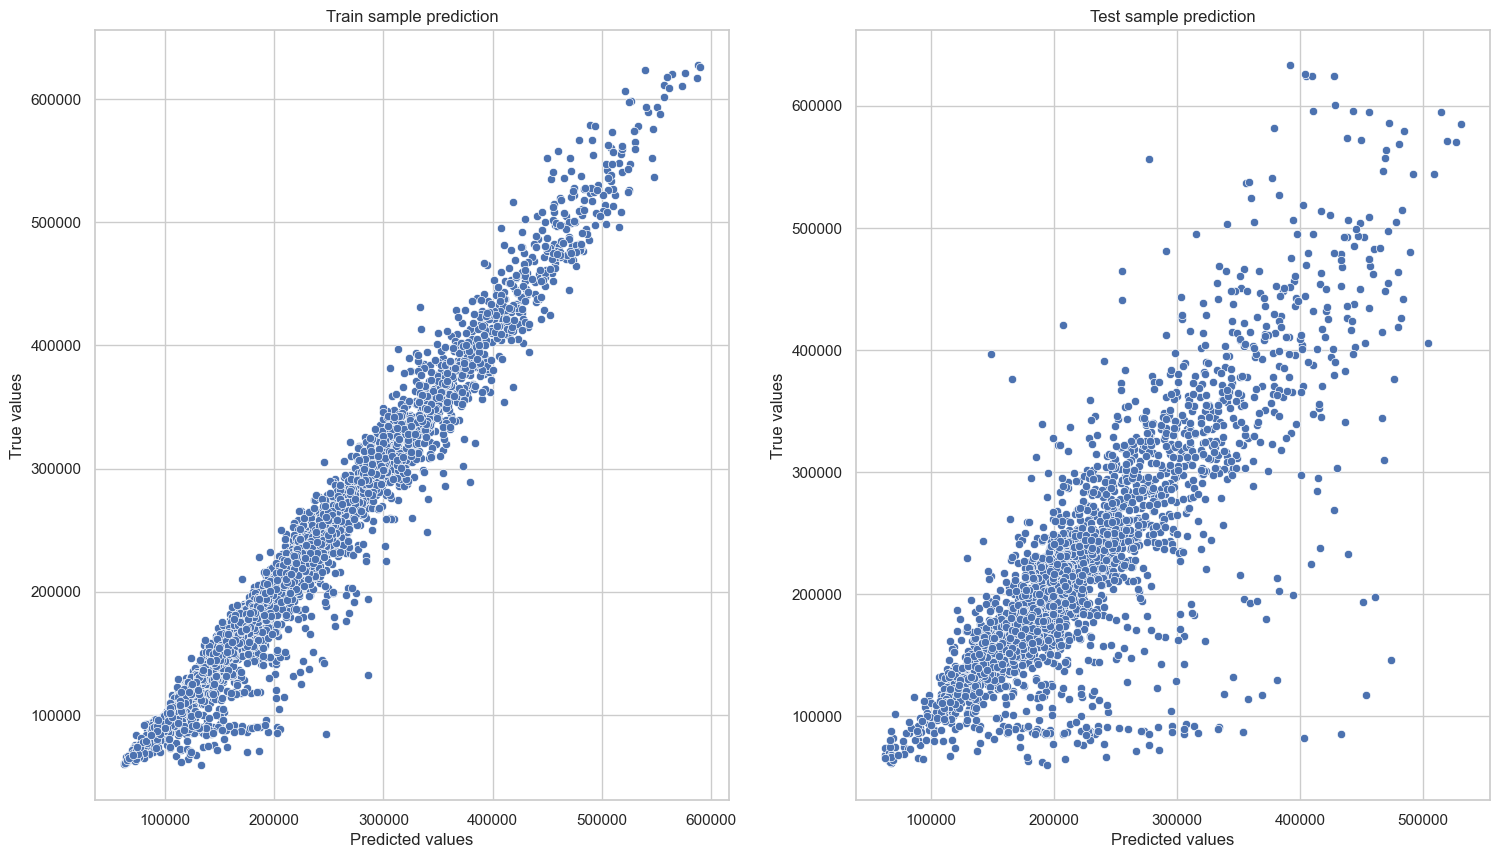

In [4935]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [4936]:
z['Price'] = rf_model.predict(z)
b['Price'] = rf_model.predict(b)


In [4937]:
z.head()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2_bin,Ecology_3_bin,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2_bin,IsDistrictLarge,MedPriceBySquare,Price
0,2.0,49,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,900.0,0,0,1,0,188156.917393,160758.366566
1,2.0,69,33.212824,3.0,1,1.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,0,247592.927280,202927.099121
2,2.0,73,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,900.0,3,3,1,0,258424.622241,354909.555245
3,1.0,47,43.387569,3.0,17,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0,1,184556.601498,145351.458127
4,1.0,40,33.212824,3.0,21,21.0,1977,0.049637,1,1,34,7759,0,229.0,1,3,1,0,165902.713282,185079.650443


Text(0.5, 1.0, 'Train sample prediction')

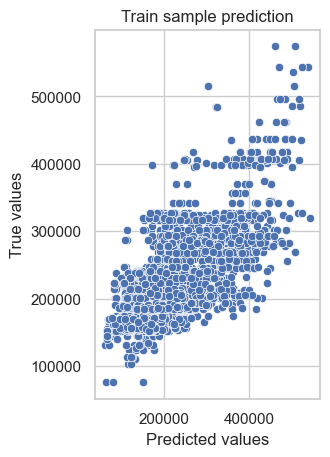

In [4938]:
plt.subplot(121)
sns.scatterplot(x=z['Price'], y=z['MedPriceBySquare'])
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Train sample prediction')

Text(0.5, 1.0, 'Train sample prediction')

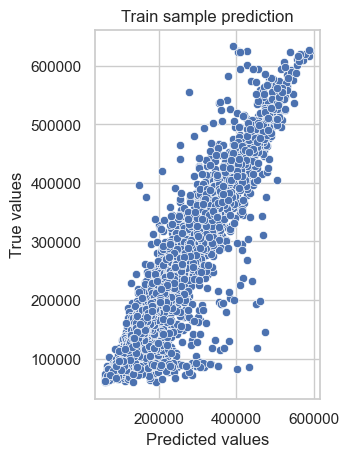

In [4939]:
plt.subplot(121)
sns.scatterplot(x=b['Price'], y=train_df['Price'])
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('Train sample prediction')

In [4940]:
# Кросвалидация для оценки качаства модели
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.70927811, 0.74791823, 0.72486746])

In [4941]:
cv_score.mean()

0.7273546001858788

In [4942]:
#Важность признаков
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),
                    columns=['feature_name', 'importance'])
    
feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
18,MedPriceBySquare,0.238500
1,Square,0.165905
10,Social_1,0.088881
11,Social_2,0.082232
0,Rooms,0.066993
12,Social_3,0.055735
17,IsDistrictLarge,0.053178
7,Ecology_1,0.039982
6,HouseYear,0.039771
2,LifeSquare,0.036127


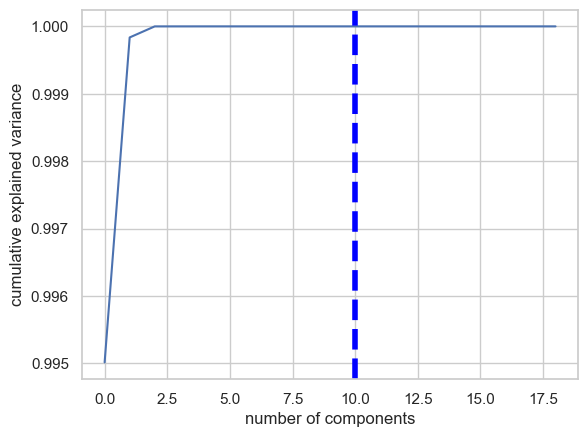

None

In [4943]:
pca_test = PCA(n_components=19)
pca_test.fit(X_train, y_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='blue', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())


In [4944]:
#Улучшение модели с помощью метода главных компонент
pca = PCA(n_components=10)
# training_features = pca.fit_transform(X_train)
pca.fit(X_train, y_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
rf_model.fit(training_features, y_train)


RandomForestRegressor(random_state=21)

In [4945]:
#Создаем и выводим датафрейм с десятью главными компонентами
a = list(feature_importances.sort_values(by='importance', ascending=False).head(10)['feature_name'])
z = z[a]
original_test_df = test_df[original_columns]

In [4946]:
original_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4872 entries, 0 to 4871
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4872 non-null   object 
 1   DistrictId     4872 non-null   object 
 2   Rooms          4872 non-null   float64
 3   Square         4872 non-null   int64  
 4   LifeSquare     4872 non-null   float64
 5   KitchenSquare  4872 non-null   float64
 6   Floor          4872 non-null   int64  
 7   HouseFloor     4872 non-null   float64
 8   HouseYear      4872 non-null   int64  
 9   Ecology_1      4872 non-null   float64
 10  Ecology_2      4872 non-null   object 
 11  Ecology_3      4872 non-null   object 
 12  Social_1       4872 non-null   int64  
 13  Social_2       4872 non-null   int64  
 14  Social_3       4872 non-null   int64  
 15  Healthcare_1   4872 non-null   float64
 16  Helthcare_2    4872 non-null   int64  
 17  Shops_1        4872 non-null   int64  
 18  Shops_2 

In [4947]:
original_test_df['Price'] = rf_model.predict(z)

In [4950]:
original_test_df.to_csv(RESULT_DATASET_PATH, sep=',', encoding='utf-8')